# Basic spatial raster operations

- reprojection
- stacking
- viualisation
- clipping
- mosaicking
- zonal statistics

## Reading and writing

In [1]:
from os.path import join as pjoin
import numpy as np
import xarray as xr

import datashader as ds
from datashader.transfer_functions import shade
from datashader.transfer_functions import stack
from datashader.transfer_functions import dynspread
from datashader.transfer_functions import set_background
from datashader.colors import Elevation

import xrspatial


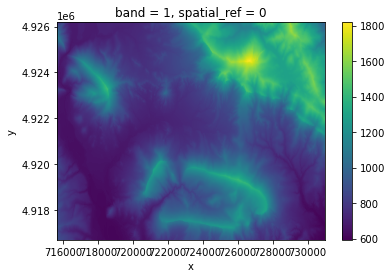

In [2]:
import rioxarray
from xrspatial import hillshade

data_dir = '../data'
dem = rioxarray.open_rasterio("../data/dem2.tif")
dem.plot()
#stack(
#    shade(hillshade(dem), cmap=["grey", "white"]),
#    shade(dem, cmap=Elevation, alpha=128),)

## Reprojection

## Stacking and visualisation